In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

In [2]:
#Read AB_NYC_2019.csv into DataFrame
AB_NYC_2019 = pd.read_csv('E:/Udacity/data science blog post/AB_NYC_2019.csv')
AB_NYC_2019.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
#Check world_happiness_report_2019 information
AB_NYC_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [4]:
#Print AB_NYC_2019 describe
AB_NYC_2019.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [5]:
#Print DataFrane shapex
AB_NYC_2019.shape

(48895, 16)

### Question 1: Which neighborhood_group has the highest price?

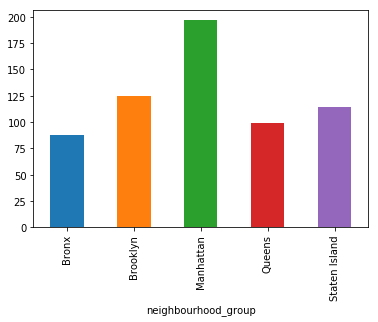

In [6]:
# in 2019
AB_NYC_2019.groupby(['neighbourhood_group']).mean()['price'].plot(kind = 'bar')
plt.show()

In [7]:
'The {} has the hightest price'.format('Manhattan')

'The Manhattan has the hightest price'

### Question 2: What are the reviews per month of the neighbourhood_group?

In [8]:
NEW_AB_NYC_2019 = pd.read_csv('E:/Udacity/data science blog post/AB_NYC_2019.csv', usecols=['host_name', 'neighbourhood_group', 'neighbourhood',
                                                     'room_type', 'reviews_per_month', 'price'])
NEW_AB_NYC_2019.head()

,host_name,neighbourhood_group,neighbourhood,room_type,price,reviews_per_month
0,John,Brooklyn,Kensington,Private room,149,0.21
1,Jennifer,Manhattan,Midtown,Entire home/apt,225,0.38
2,Elisabeth,Manhattan,Harlem,Private room,150,NaN
3,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,4.64
4,Laura,Manhattan,East Harlem,Entire home/apt,80,0.10


['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


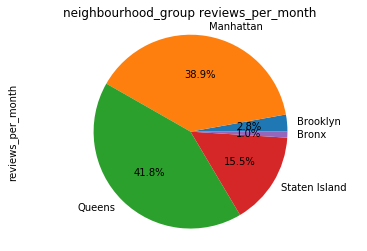

In [9]:
# Fill numeric columns with the mean
num_vars = NEW_AB_NYC_2019.select_dtypes(include=['float', 'int']).columns
for col in num_vars:
    NEW_AB_NYC_2019[col].fillna((NEW_AB_NYC_2019[col].mean()), inplace=True)

NEW_AB_NYC_2019.dropna(how='any', axis = 0, inplace = True)

labels = NEW_AB_NYC_2019['neighbourhood_group'].unique()
print(labels)

NEW_AB_NYC_2019.groupby(['neighbourhood_group']).sum()['reviews_per_month'].plot(kind='pie', center=(0,0),
                                                                                 labels=labels,autopct='%1.1f%%')
plt.title('neighbourhood_group reviews_per_month')
plt.axis('equal')
plt.show()

### Qiestion 3:What is the percentage of available room less than 30 days?

In [ ]:
AB_NYC_2019_30PER = (AB_NYC_2019[AB_NYC_2019['availability_365'] < 30].shape[0]/AB_NYC_2019.shape[0])
'The percentage of available room less than 30 days is {}'.format(AB_NYC_2019_30PER)